In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data expolatory

In [ ]:
# Read data
mtpl_orig = pd.read_csv('Data/Assignment-Copy1.csv')

In [19]:
# describe 

mtpl_orig.describe()
print (mtpl_orig.describe(include = 'object'))

        agecar    sexp   fuelc   split     usec  fleetc  sportc  coverp  \
count   163657  163657  163657  163657   163657  163657  163657  163657   
unique       4       2       2       4        2       2       2       3   
top       6-10    Male  Petrol       1  Private      No      No    MTPL   
freq     67151  120434  113210   81479   155652  158428  162145   95409   

        powerc  
count   163657  
unique       3  
top        <66  
freq    119809  


In [20]:
unique_values = mtpl_orig['split'].unique()
print(unique_values)

[1 2 'Thrice' 'Monthly']


In [26]:
# Read data
mtpl_orig = pd.read_csv('Data/Assignment-Copy1.csv')

# Rename columns to lowercase
mtpl_orig.columns = [col.lower() for col in mtpl_orig.columns]

# Rename columns to lowercase
mtpl = mtpl_orig
# Redefine split 
replacement_dict = {'Once': 1, 'Twice': 2, 'Thrice': 3, 'Monthly': 12}

# Replace values in the 'col1' column using the dictionary
mtpl['split'] = mtpl['split'].replace(replacement_dict)

# Calculate mean and frequency
m = mtpl['nbrtotc'].mean()
freq = mtpl['nbrtotc'].sum() / mtpl['duree'].sum()

# Print dimensions
print(mtpl.shape)

(163657, 16)


/var/folders/n3/j9s0z6s92fd1_xkmg3xk0twh0000gn/T/ipykernel_10207/1633734843.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mtpl['split'] = mtpl['split'].replace(replacement_dict)


In [27]:
mtpl

,ageph,codposs,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,1,Private,No,No,MTPL+,66-110
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,2,Private,No,No,MTPL,66-110
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,3,Private,No,No,MTPL,<66
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,1,Professional,No,No,MTPL+++,66-110
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,1,Private,No,No,MTPL+,<66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163652,50,9960,1.000000,0.000000,0,0.000000,0.000000,2-5,Male,Petrol,1,Private,No,No,MTPL+,<66
163653,86,9960,1.000000,0.000000,0,0.000000,0.000000,6-10,Male,Petrol,1,Private,No,No,MTPL,<66
163654,64,9960,1.000000,0.000000,0,0.000000,0.000000,2-5,Male,Petrol,2,Private,No,No,MTPL,<66
163655,58,9970,1.000000,0.000000,1,1.000000,3177.994988,>10,Male,Petrol,1,Private,Yes,No,MTPL,<66


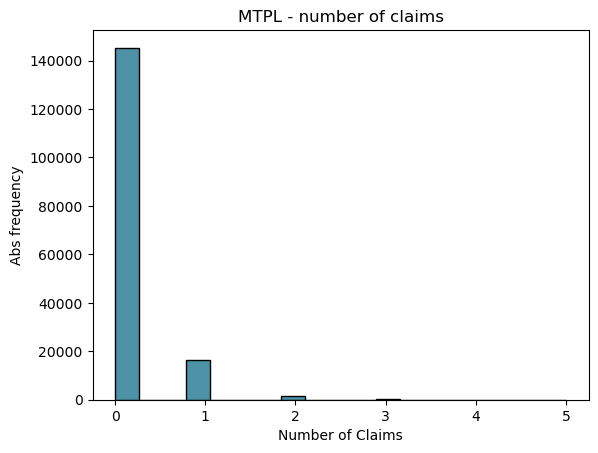

In [28]:

# Visualization
KULbg = "#116E8A"
g = sns.histplot(mtpl['nbrtotc'], color=KULbg)
g.set(xlabel='Number of Claims', ylabel='Abs frequency', title='MTPL - number of claims')
plt.show()



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


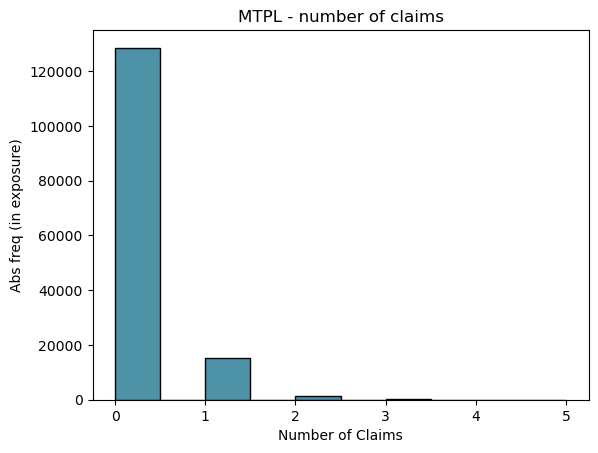

In [29]:
g = sns.histplot(mtpl, x='nbrtotc', weights='duree', color=KULbg)
g.set(xlabel='Number of Claims', ylabel='Abs freq (in exposure)', title='MTPL - number of claims')
plt.show()



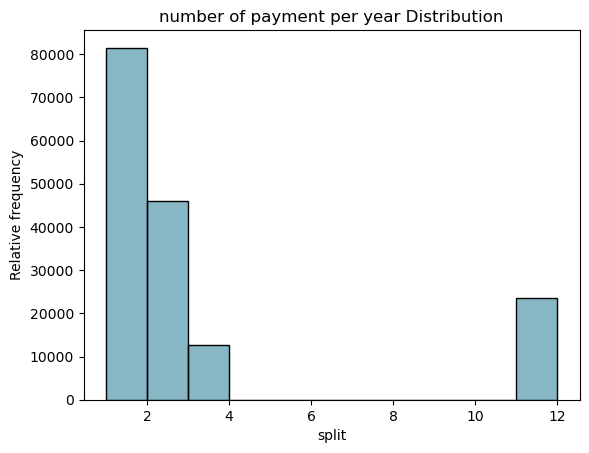

In [32]:
g = sns.histplot(mtpl['split'], binwidth=1, color=KULbg, alpha=0.5)
g.set(xlabel='split', ylabel='Relative frequency', title='number of payment per year Distribution')
plt.show()

In [33]:
# Wrapper functions
def ggplot_bar(DT, variable, xlab):
    g = sns.histplot(data=DT, x=variable, stat='density', color=KULbg, alpha=0.5)
    g.set(xlabel=xlab, ylabel='Relative frequency')
    plt.show()

def ggplot_hist(DT, variable, xlab, binwidth):
    g = sns.histplot(data=DT, x=variable, binwidth=binwidth, stat='density', color=KULbg, alpha=0.5)
    g.set(xlabel=xlab, ylabel='Relative frequency')
    plt.show()

In [48]:
mtpl_sv = mtpl[(mtpl['chargtot'] > 8000)]
mtpl_sv

,ageph,codposs,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
20,52,1070,0.452055,-0.793952,3,6.636364,8885.396345,6-10,Female,Petrol,12,Private,No,Yes,MTPL,>110
192,31,6000,1.000000,0.000000,1,1.000000,8530.685500,6-10,Female,Petrol,3,Private,No,No,MTPL,66-110
388,35,7090,1.000000,0.000000,1,1.000000,10287.581278,6-10,Female,Gasoil,12,Private,No,No,MTPL,66-110
949,41,5000,0.293151,-1.227069,1,3.411215,407477.633810,2-5,Female,Petrol,1,Private,No,No,MTPL+,66-110
1159,26,8540,0.947945,-0.053459,1,1.054913,20203.322269,>10,Female,Petrol,2,Private,No,No,MTPL,<66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161889,52,1380,1.000000,0.000000,1,1.000000,8775.430777,2-5,Male,Gasoil,1,Professional,No,No,MTPL+++,<66
161893,79,1390,1.000000,0.000000,1,1.000000,20381.260241,2-5,Male,Petrol,1,Private,No,No,MTPL,<66
162792,44,6000,0.641096,-0.444576,2,3.119658,9865.220291,0-1,Male,Petrol,12,Private,No,No,MTPL+++,66-110
162859,27,6000,0.893151,-0.113000,1,1.119632,67271.212869,2-5,Male,Petrol,3,Private,No,No,MTPL,<66


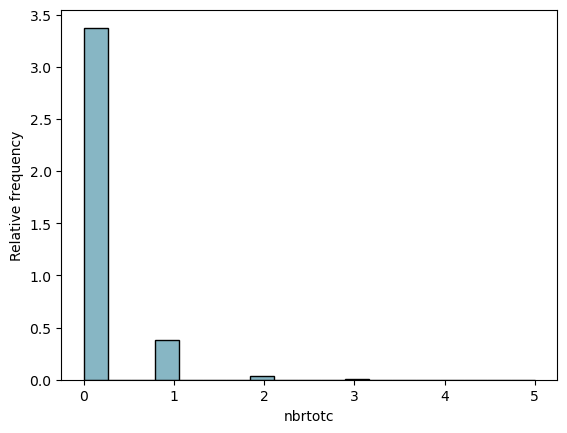

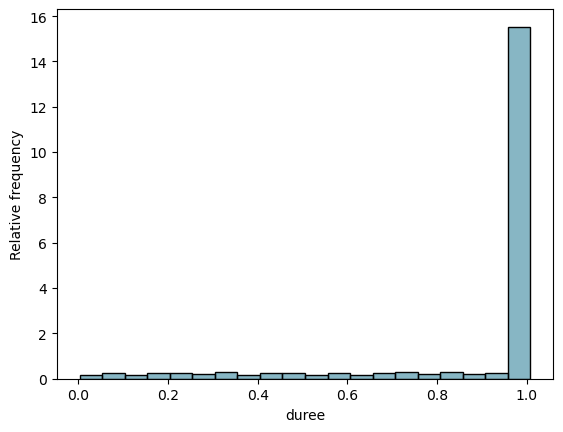

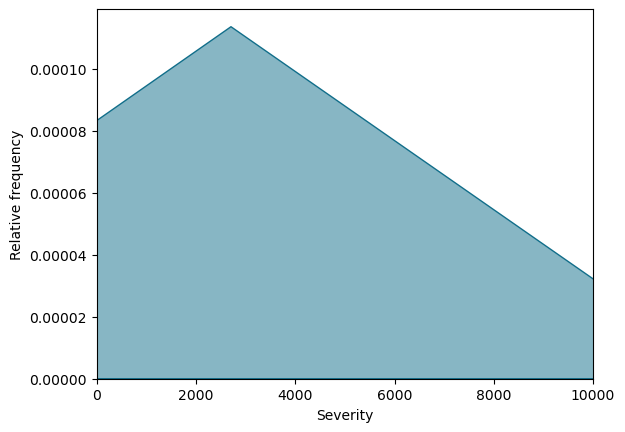

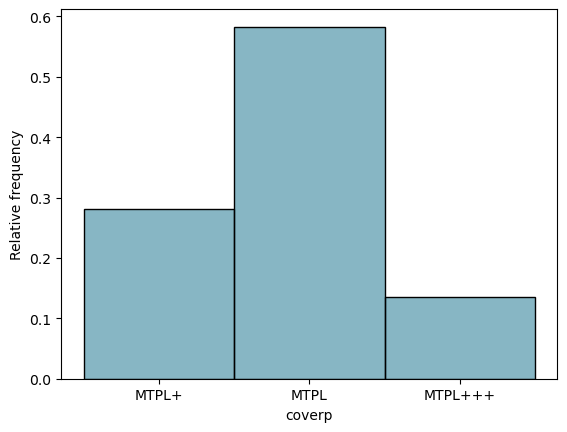

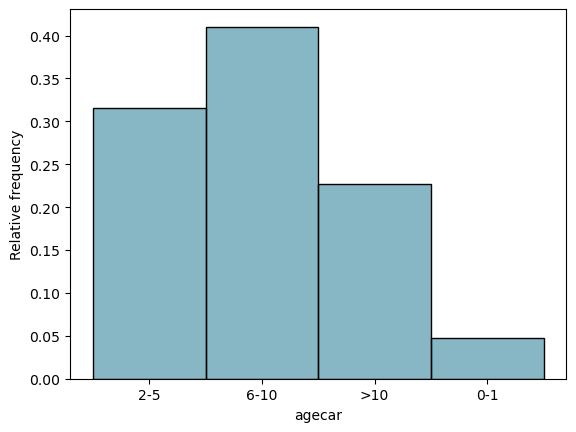

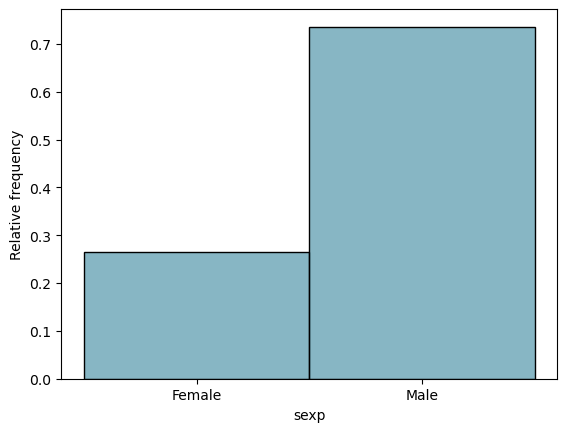

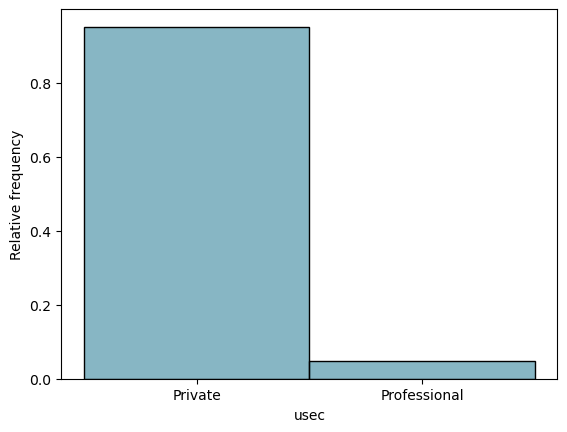

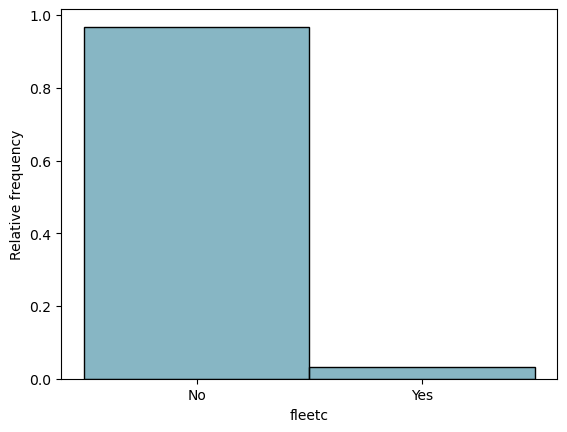

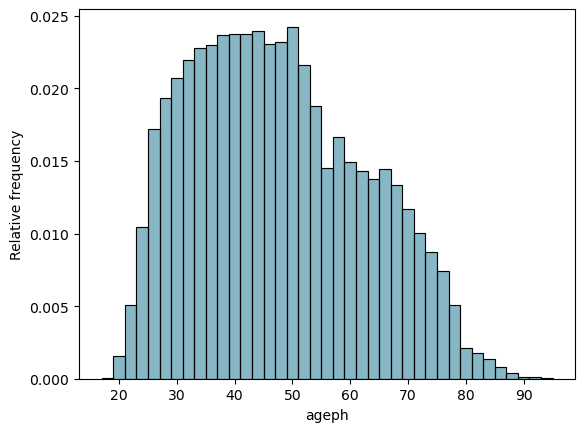

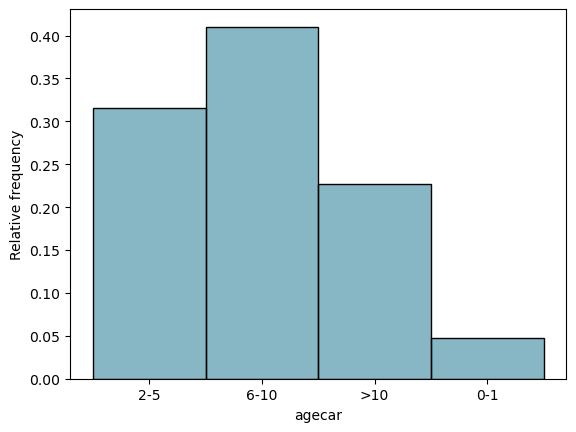

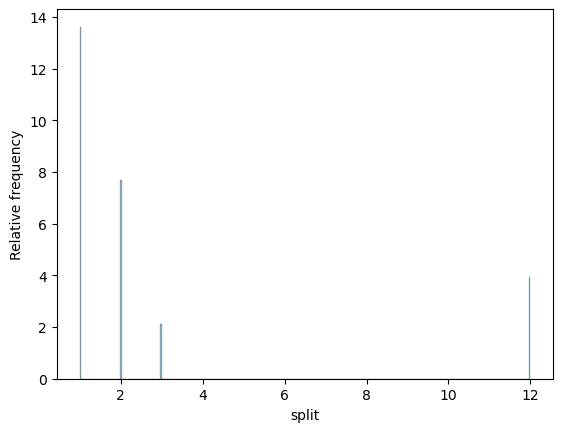

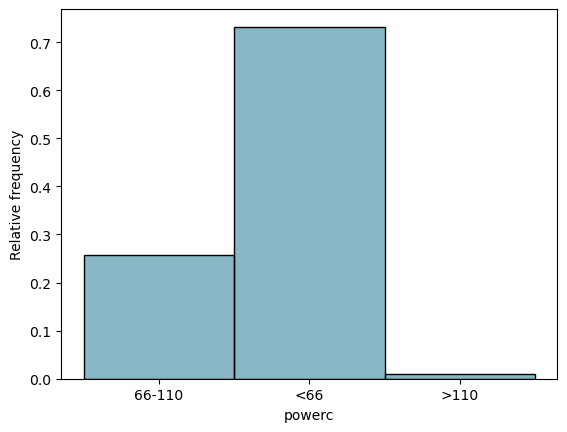

In [44]:
# Targets: frequency, exposure, and total severity
ggplot_bar(mtpl, 'nbrtotc', 'nbrtotc')
ggplot_hist(mtpl, 'duree', 'duree', 0.05)

mtpl_sev = mtpl[(mtpl['chargtot'] > 0)]# & (mtpl['avg'] <= 81000)]  # Filter data
g = sns.kdeplot(data=mtpl_sev['chargtot'], color=KULbg, fill=True, alpha=0.5)
g.set(xlabel='Severity', ylabel='Relative frequency')
plt.xlim(0, 1e4)
plt.show()

# Bar plots of factor variables
for column in ['coverp', 'agecar', 'sexp', 'usec', 'fleetc']:
    ggplot_bar(mtpl, column, column)

# Histograms of continuous variables
ggplot_hist(mtpl, 'ageph', 'ageph', 2)
ggplot_hist(mtpl, 'agecar', 'agecar', 1)
ggplot_bar(mtpl, 'split', 'split')
ggplot_hist(mtpl, 'powerc', 'powerc', 10)